In [21]:
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K


In [22]:
K.set_image_data_format('channels_first')

In [23]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


In [24]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [52]:
class_names = np.unique(y_train)
class_names


array([0., 1.], dtype=float32)

In [25]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [26]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [27]:
# Create the simple model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [28]:
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)              

In [29]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 120s 2ms/step - loss: 1.7209 - accuracy: 0.3741 - val_loss: 1.3383 - val_accuracy: 0.5174
Epoch 2/25
50000/50000 [==============================] - 121s 2ms/step - loss: 1.3260 - accuracy: 0.5249 - val_loss: 1.1757 - val_accuracy: 0.5802
Epoch 3/25
50000/50000 [==============================] - 120s 2ms/step - loss: 1.1425 - accuracy: 0.5958 - val_loss: 1.0642 - val_accuracy: 0.6220
Epoch 4/25
50000/50000 [==============================] - 123s 2ms/step - loss: 1.0153 - accuracy: 0.6399 - val_loss: 0.9882 - val_accuracy: 0.6501
Epoch 5/25
50000/50000 [==============================] - 126s 3ms/step - loss: 0.9194 - accuracy: 0.6743 - val_loss: 0.9606 - val_accuracy: 0.6624
Epoch 6/25
50000/50000 [==============================] - 128s 3ms/step - loss: 0.8329 - accuracy: 0.7043 - val_loss: 0.9330 - val_accuracy: 0.6712
Epoch 7/25
500

In [58]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 78.52%


In [ ]:
yPred = model.predict_classes(X_test)
yPred_probabilities = model.predict(X_test)

In [ ]:
yTest_original=np.argmax(y_test,axis=1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=yTest_original, y_pred=yPred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=yTest_original, y_pred=yPred))

In [31]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [32]:
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 16, 16)       

In [33]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 237s 5ms/step - loss: 1.9380 - accuracy: 0.2850 - val_loss: 1.6914 - val_accuracy: 0.4040
Epoch 2/25
50000/50000 [==============================] - 231s 5ms/step - loss: 1.4984 - accuracy: 0.4542 - val_loss: 1.3415 - val_accuracy: 0.5021
Epoch 3/25
50000/50000 [==============================] - 230s 5ms/step - loss: 1.2849 - accuracy: 0.5346 - val_loss: 1.2188 - val_accuracy: 0.5682
Epoch 4/25
50000/50000 [==============================] - 232s 5ms/step - loss: 1.1428 - accuracy: 0.5918 - val_loss: 1.0679 - val_accuracy: 0.6152
Epoch 5/25
50000/50000 [==============================] - 225s 5ms/step - loss: 1.0287 - accuracy: 0.6325 - val_loss: 1.0136 - val_accuracy: 0.6396
Epoch 6/25
50000/50000 [==============================] - 224s 4ms/step - loss: 0.9433 - accuracy: 0.6615 - val_loss: 0.9368 - val_accuracy: 0.6654
Epoch 7/25
50000/50000 [==============================] - 227s

In [34]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 78.52%


In [38]:
yPred = model.predict_classes(X_test)
yPred_probabilities = model.predict(X_test)

In [39]:
yPred

array([3, 8, 8, ..., 5, 1, 7])

In [40]:
yPred_probabilities

array([[1.3586065e-04, 2.0894799e-05, 2.2023567e-04, ..., 1.1583920e-04,
        7.7136373e-04, 1.3461304e-05],
       [2.0752572e-04, 6.5160091e-03, 1.9402671e-09, ..., 3.3475975e-10,
        9.9320614e-01, 7.0281778e-05],
       [8.2484365e-02, 1.9813869e-03, 2.3867502e-05, ..., 6.1286119e-06,
        9.1310012e-01, 2.3144595e-03],
       ...,
       [3.9346023e-07, 3.8494345e-08, 1.0899178e-03, ..., 1.6340257e-03,
        1.4877384e-06, 6.0927414e-07],
       [5.0838362e-02, 9.4010091e-01, 1.3615952e-04, ..., 1.1152251e-05,
        8.8631251e-04, 8.2720275e-04],
       [2.1346890e-10, 6.9152475e-13, 6.2831397e-08, ..., 9.9874049e-01,
        1.0427418e-11, 1.6343730e-11]], dtype=float32)

In [42]:
import numpy as np

In [43]:
yTest_original=np.argmax(y_test,axis=1)

In [44]:
yTest_original

array([3, 8, 8, ..., 5, 1, 7])

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=yTest_original, y_pred=yPred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=yTest_original, y_pred=yPred))

Classification report 
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.91      0.87      0.89      1000
           2       0.77      0.66      0.71      1000
           3       0.58      0.64      0.61      1000
           4       0.73      0.77      0.75      1000
           5       0.73      0.68      0.70      1000
           6       0.86      0.82      0.84      1000
           7       0.84      0.82      0.83      1000
           8       0.81      0.92      0.86      1000
           9       0.85      0.85      0.85      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

Confusion matrix 
[[826  13  23  10  14   4   1   5  75  29]
 [ 12 870   2   7   2   2   3   1  34  67]
 [ 65   4 657  65  78  38  48  21  17   7]
 [ 18   4  46 639  59 129  45  30  15  15]
 [ 22   4  45  67 774  19  2

In [48]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix\n============================")
    else:
        print('Confusion matrix, without normalization\n============================')
    print(cm)
    print("\n")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()

In [49]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true=yTest_original, y_pred=yPred)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[826  13  23  10  14   4   1   5  75  29]
 [ 12 870   2   7   2   2   3   1  34  67]
 [ 65   4 657  65  78  38  48  21  17   7]
 [ 18   4  46 639  59 129  45  30  15  15]
 [ 22   4  45  67 774  19  20  39   8   2]
 [ 13   1  19 187  45 675  13  37   7   3]
 [  8   1  31  60  34  20 825   7  11   3]
 [ 11   2  20  39  55  37   4 818   6   8]
 [ 30  10   5  13   3   2   3   3 916  15]
 [ 28  50   5   9   0   5   2  12  37 852]]




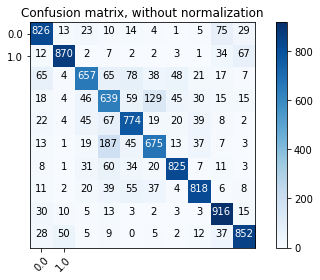

In [53]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.83 0.01 0.02 0.01 0.01 0.   0.   0.01 0.07 0.03]
 [0.01 0.87 0.   0.01 0.   0.   0.   0.   0.03 0.07]
 [0.07 0.   0.66 0.07 0.08 0.04 0.05 0.02 0.02 0.01]
 [0.02 0.   0.05 0.64 0.06 0.13 0.04 0.03 0.01 0.01]
 [0.02 0.   0.04 0.07 0.77 0.02 0.02 0.04 0.01 0.  ]
 [0.01 0.   0.02 0.19 0.04 0.68 0.01 0.04 0.01 0.  ]
 [0.01 0.   0.03 0.06 0.03 0.02 0.82 0.01 0.01 0.  ]
 [0.01 0.   0.02 0.04 0.06 0.04 0.   0.82 0.01 0.01]
 [0.03 0.01 0.01 0.01 0.   0.   0.   0.   0.92 0.01]
 [0.03 0.05 0.01 0.01 0.   0.01 0.   0.01 0.04 0.85]]




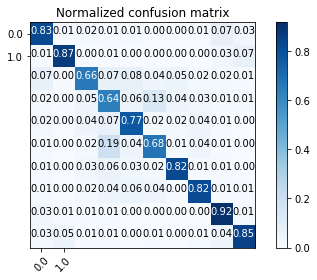

In [54]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
title='Normalized confusion matrix')
plt.show()